In [50]:
%pip install tensorflow pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [51]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [52]:

# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [53]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("D:/Thái/Phân tích thống kê/Silver_data_filtered.csv")

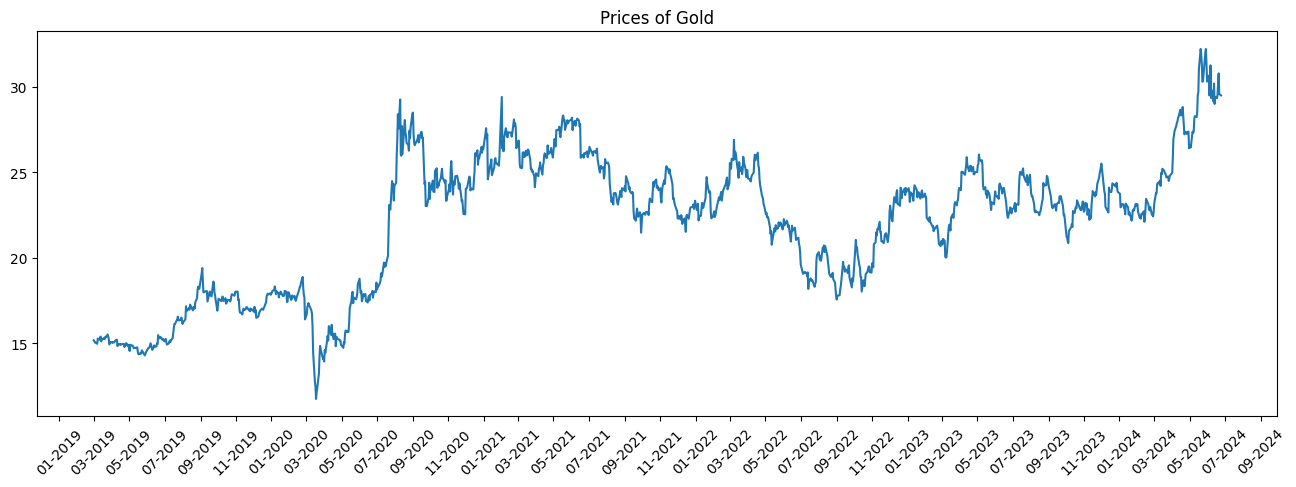

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.date,format='%m/%d/%Y')

# Flip the column
#df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'close' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Gold')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

Split dataset (7-2-1)

In [55]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [56]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [57]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [58]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.14236, saving model to save_model_7_2_1.keras
19/19 - 20s - 1s/step - loss: 0.1424
Epoch 2/80

Epoch 2: loss improved from 0.14236 to 0.04066, saving model to save_model_7_2_1.keras
19/19 - 0s - 19ms/step - loss: 0.0407
Epoch 3/80

Epoch 3: loss improved from 0.04066 to 0.02664, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0266
Epoch 4/80

Epoch 4: loss improved from 0.02664 to 0.02568, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0257
Epoch 5/80

Epoch 5: loss improved from 0.02568 to 0.02460, saving model to save_model_7_2_1.keras
19/19 - 0s - 22ms/step - loss: 0.0246
Epoch 6/80

Epoch 6: loss improved from 0.02460 to 0.02357, saving model to save_model_7_2_1.keras
19/19 - 1s - 28ms/step - loss: 0.0236
Epoch 7/80

Epoch 7: loss improved from 0.02357 to 0.02301, saving model to save_model_7_2_1.keras
19/19 - 1s - 30ms/step - loss: 0.0230
Epoch 8/80

Epoch 8: loss did not improve from

In [59]:

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step


In [60]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [61]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [62]:
# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


In [63]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [64]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8574833869934082], [0.848701536655426], [0.8405032753944397], [0.8317368030548096], [0.8231745362281799], [0.8147541880607605], [0.806486964225769], [0.7983641028404236], [0.7903706431388855], [0.7825029492378235], [0.7747573852539062], [0.7671304941177368], [0.759618878364563], [0.7522191405296326], [0.7449281811714172], [0.7377427816390991], [0.730660080909729], [0.7236772179603577], [0.7167914509773254], [0.7100005149841309], [0.703301727771759], [0.6966928243637085], [0.6901715397834778], [0.6837358474731445], [0.6773837804794312], [0.6711133718490601], [0.6649224758148193], [0.6588096618652344], [0.652772843837738], [0.6468105316162109]]


In [65]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [66]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.28768493]
 [29.10792046]
 [28.94010205]
 [28.76065236]
 [28.58538276]
 [28.41301823]
 [28.24378816]
 [28.07751319]
 [27.91388707]
 [27.75283537]
 [27.59428368]
 [27.43816121]
 [27.28439844]
 [27.13292581]
 [26.98367987]
 [26.83659474]
 [26.69161186]
 [26.54867265]
 [26.407721  ]
 [26.26871054]
 [26.13158637]
 [25.99630211]
 [25.86281142]
 [25.7310728 ]
 [25.60104599]
 [25.47269072]
 [25.34596308]
 [25.22083378]
 [25.09726011]
 [24.97521158]]


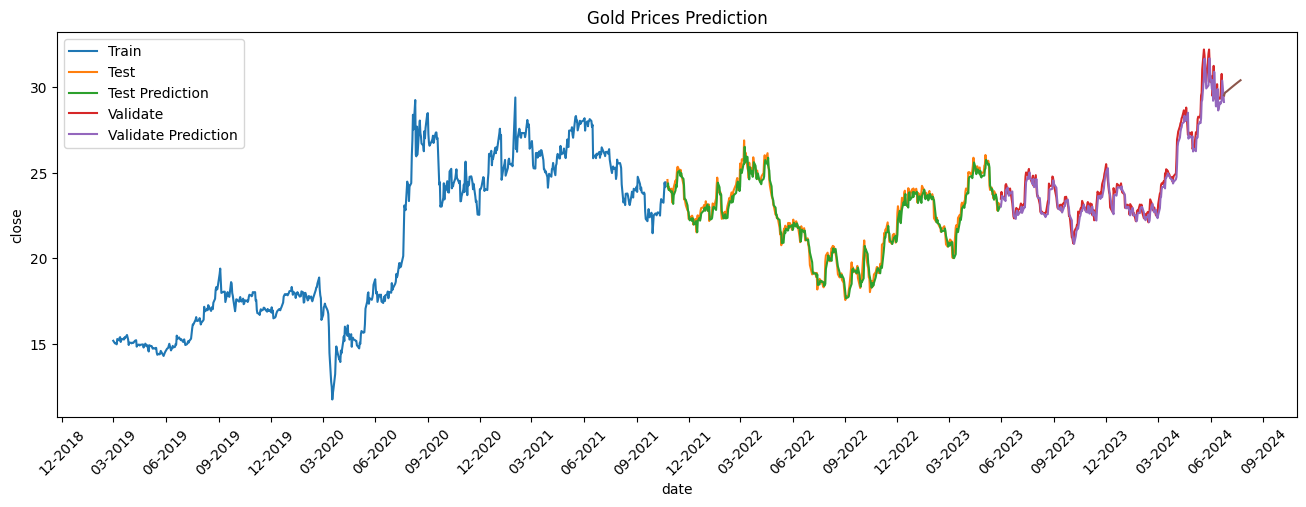

In [97]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

In [68]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.31289025947485083
MAPE:  1.3521658121281948
RMSE:  0.4050204551857234

** Validate **
MAE:  0.3822932948359736
MAPE:  1.4420398154060547
RMSE:  0.5556474438882847


Split dataset (6-3-1)

In [69]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [70]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [71]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [72]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.19586, saving model to save_model_6_3_1.keras
16/16 - 17s - 1s/step - loss: 0.1959
Epoch 2/80

Epoch 2: loss improved from 0.19586 to 0.07448, saving model to save_model_6_3_1.keras
16/16 - 1s - 45ms/step - loss: 0.0745
Epoch 3/80

Epoch 3: loss improved from 0.07448 to 0.03113, saving model to save_model_6_3_1.keras
16/16 - 0s - 28ms/step - loss: 0.0311
Epoch 4/80

Epoch 4: loss improved from 0.03113 to 0.02409, saving model to save_model_6_3_1.keras
16/16 - 0s - 22ms/step - loss: 0.0241
Epoch 5/80

Epoch 5: loss improved from 0.02409 to 0.02335, saving model to save_model_6_3_1.keras
16/16 - 0s - 28ms/step - loss: 0.0234
Epoch 6/80

Epoch 6: loss did not improve from 0.02335
16/16 - 0s - 20ms/step - loss: 0.0243
Epoch 7/80

Epoch 7: loss did not improve from 0.02335
16/16 - 0s - 17ms/step - loss: 0.0237
Epoch 8/80

Epoch 8: loss did not improve from 0.02335
16/16 - 0s - 17ms/step - loss: 0.0239
Epoch 9/80

Epoch 9: loss improved from 0

In [73]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)
     

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [74]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [75]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step 


In [76]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [77]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [78]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8578254580497742], [0.8519746661186218], [0.847093939781189], [0.8410784006118774], [0.8351907134056091], [0.8293258547782898], [0.8236308693885803], [0.8181003928184509], [0.8126988410949707], [0.8074176907539368], [0.8022491931915283], [0.7971907258033752], [0.7922394275665283], [0.7873918414115906], [0.7826443314552307], [0.7779935598373413], [0.7734363079071045], [0.7689695358276367], [0.764590322971344], [0.7602958083152771], [0.7560832500457764], [0.7519500851631165], [0.7478942275047302], [0.7439131140708923], [0.7400045394897461], [0.7361664772033691], [0.7323966026306152], [0.7286930680274963], [0.7250539660453796], [0.7214775085449219]]


In [79]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.29468713]
 [29.17492142]
 [29.07501295]
 [28.95187486]
 [28.8313539 ]
 [28.71130025]
 [28.5947239 ]
 [28.48151504]
 [28.37094528]
 [28.26284013]
 [28.15704098]
 [28.05349416]
 [27.95214108]
 [27.85291099]
 [27.75572946]
 [27.66052817]
 [27.56724122]
 [27.4758064 ]
 [27.38616391]
 [27.2982552 ]
 [27.21202413]
 [27.12741824]
 [27.04439484]
 [26.96290145]
 [26.88289292]
 [26.80432779]
 [26.72715846]
 [26.6513471 ]
 [26.57685468]
 [26.5036446 ]]


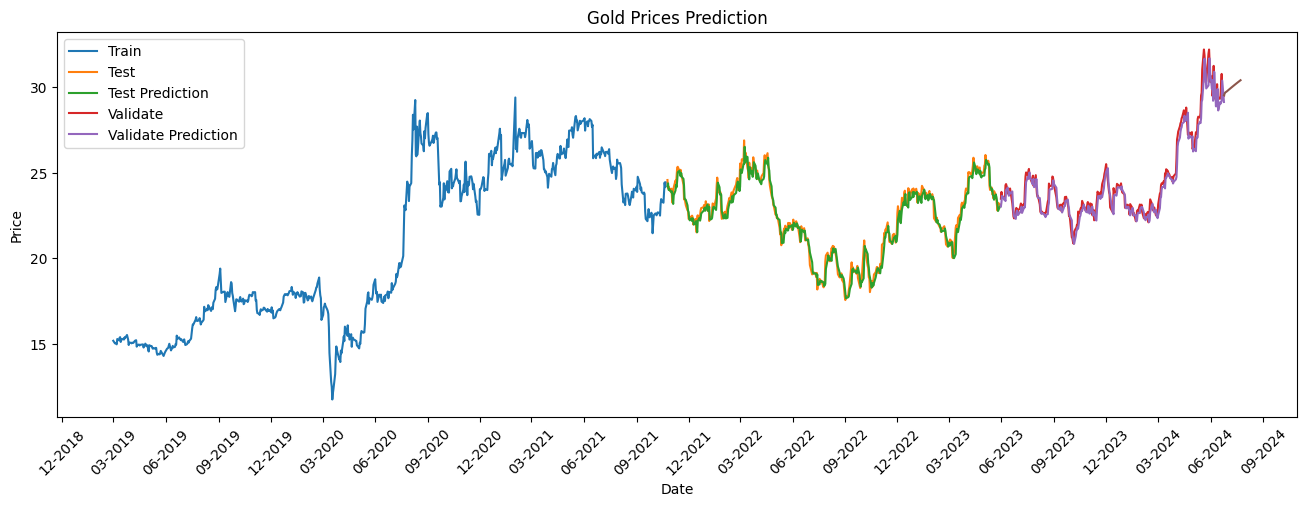

In [96]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

In [81]:

evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3047008526200368
MAPE:  1.3867162621038018
RMSE:  0.402288617755904

** Validate **
MAE:  0.37809832322862397
MAPE:  1.4127107509060244
RMSE:  0.5538236574730798


Split dataset (5-3-2)

In [82]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [83]:

# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [84]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [85]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.21501, saving model to save_model_5_3_2.keras
14/14 - 15s - 1s/step - loss: 0.2150
Epoch 2/80

Epoch 2: loss improved from 0.21501 to 0.08261, saving model to save_model_5_3_2.keras
14/14 - 0s - 22ms/step - loss: 0.0826
Epoch 3/80

Epoch 3: loss improved from 0.08261 to 0.03313, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0331
Epoch 4/80

Epoch 4: loss improved from 0.03313 to 0.02544, saving model to save_model_5_3_2.keras
14/14 - 0s - 31ms/step - loss: 0.0254
Epoch 5/80

Epoch 5: loss improved from 0.02544 to 0.02539, saving model to save_model_5_3_2.keras
14/14 - 0s - 32ms/step - loss: 0.0254
Epoch 6/80

Epoch 6: loss did not improve from 0.02539
14/14 - 0s - 20ms/step - loss: 0.0256
Epoch 7/80

Epoch 7: loss improved from 0.02539 to 0.02446, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0245
Epoch 8/80

Epoch 8: loss did not improve from 0.02446
14/14 - 0s - 20ms/step - loss: 0.02

In [86]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step


In [87]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [88]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values
  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [89]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [90]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [91]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.869186282157898], [0.8731234073638916], [0.8765783905982971], [0.8779305815696716], [0.8790232539176941], [0.8802320957183838], [0.881599485874176], [0.8830283284187317], [0.8844394683837891], [0.8858262896537781], [0.887199342250824], [0.8885669708251953], [0.8899310231208801], [0.8912904858589172], [0.8926441669464111], [0.8939917683601379], [0.8953331708908081], [0.8966684937477112], [0.8979980945587158], [0.899321436882019], [0.9006385803222656], [0.9019496440887451], [0.9032541513442993], [0.9045524597167969], [0.9058443903923035], [0.9071298241615295], [0.9084089398384094], [0.9096814393997192], [0.910947322845459], [0.912206768989563]]


In [92]:

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.5272432 ]
 [29.60783615]
 [29.67855966]
 [29.706239  ]
 [29.72860601]
 [29.753351  ]
 [29.78134148]
 [29.81058988]
 [29.83947592]
 [29.86786415]
 [29.89597054]
 [29.92396589]
 [29.95188804]
 [29.97971625]
 [30.0074261 ]
 [30.0350115 ]
 [30.06247001]
 [30.08980407]
 [30.117021  ]
 [30.14410981]
 [30.17107174]
 [30.19790921]
 [30.22461248]
 [30.25118885]
 [30.27763467]
 [30.3039475 ]
 [30.330131  ]
 [30.35617906]
 [30.3820917 ]
 [30.40787256]]


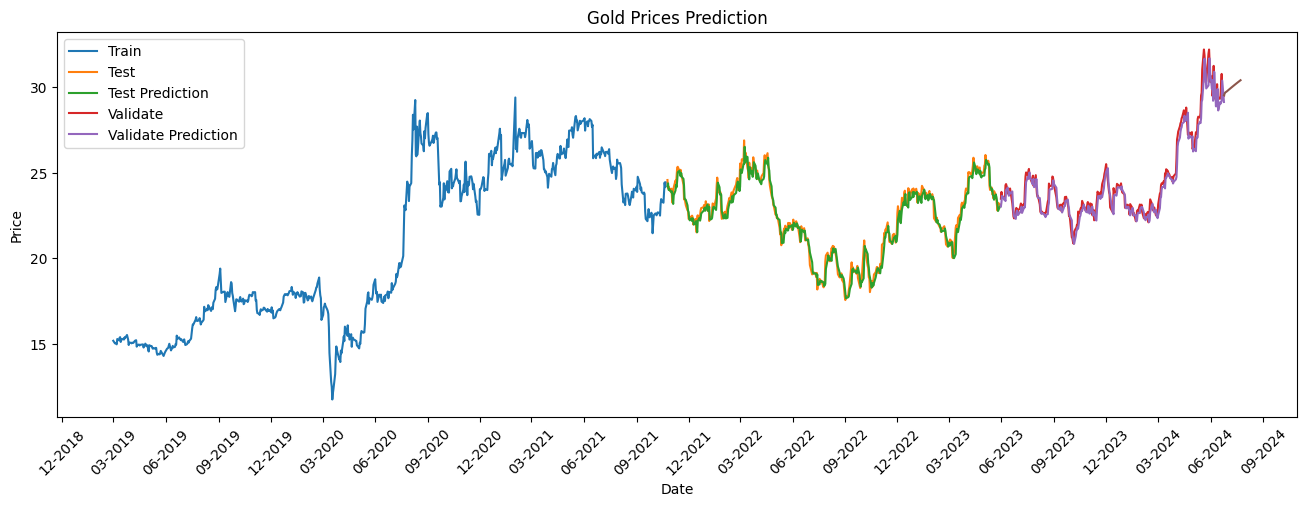

In [95]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

In [94]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3315772094726561
MAPE:  1.4868598998980855
RMSE:  0.4355347565561989

** Validate **
MAE:  0.37911883687261316
MAPE:  1.4940488686961124
RMSE:  0.5179399826328192
